In [2]:
import pandas as pd
file_path = "online_advertising_performance_data.csv"
df = pd.read_csv(file_path)


df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(5), int64(4

(None,
    month  day campaign_number user_engagement     banner placement  displays  \
 0  April    1          camp 1            High  160 x 600       abc         4   
 1  April    1          camp 1            High  160 x 600       def     20170   
 2  April    1          camp 1            High  160 x 600       ghi     14701   
 3  April    1          camp 1            High  160 x 600       mno    171259   
 4  April    1          camp 1             Low  160 x 600       def       552   
 
        cost  clicks   revenue  post_click_conversions  \
 0    0.0060       0    0.0000                       0   
 1   26.7824     158   28.9717                      23   
 2   27.6304     158   28.9771                      78   
 3  216.8750    1796  329.4518                     617   
 4    0.0670       1    0.1834                       0   
 
    post_click_sales_amount  Unnamed: 12  Unnamed: 13  
 0                   0.0000          NaN          NaN  
 1                1972.4602          NaN   

In [3]:

df_cleaned = df.drop(columns=["Unnamed: 12", "Unnamed: 13"])


df_cleaned["placement"].fillna("Unknown", inplace=True)

# Convert categorical columns to appropriate data types
df_cleaned["month"] = df_cleaned["month"].astype("category")
df_cleaned["campaign_number"] = df_cleaned["campaign_number"].astype("category")
df_cleaned["user_engagement"] = df_cleaned["user_engagement"].astype("category")
df_cleaned["banner"] = df_cleaned["banner"].astype("category")
df_cleaned["placement"] = df_cleaned["placement"].astype("category")


df_cleaned.info(), df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   month                    15408 non-null  category
 1   day                      15408 non-null  int64   
 2   campaign_number          15408 non-null  category
 3   user_engagement          15408 non-null  category
 4   banner                   15408 non-null  category
 5   placement                15408 non-null  category
 6   displays                 15408 non-null  int64   
 7   cost                     15408 non-null  float64 
 8   clicks                   15408 non-null  int64   
 9   revenue                  15408 non-null  float64 
 10  post_click_conversions   15408 non-null  int64   
 11  post_click_sales_amount  15408 non-null  float64 
dtypes: category(5), float64(3), int64(4)
memory usage: 918.9 KB


C:\Users\aishw\AppData\Local\Temp\ipykernel_22164\2554728772.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["placement"].fillna("Unknown", inplace=True)


(None,
    month  day campaign_number user_engagement     banner placement  displays  \
 0  April    1          camp 1            High  160 x 600       abc         4   
 1  April    1          camp 1            High  160 x 600       def     20170   
 2  April    1          camp 1            High  160 x 600       ghi     14701   
 3  April    1          camp 1            High  160 x 600       mno    171259   
 4  April    1          camp 1             Low  160 x 600       def       552   
 
        cost  clicks   revenue  post_click_conversions  post_click_sales_amount  
 0    0.0060       0    0.0000                       0                   0.0000  
 1   26.7824     158   28.9717                      23                1972.4602  
 2   27.6304     158   28.9771                      78                2497.2636  
 3  216.8750    1796  329.4518                     617               24625.3234  
 4    0.0670       1    0.1834                       0                   0.0000  )

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Key Metrics")
plt.show()


ValueError: could not convert string to float: 'abc'

<Figure size 800x600 with 0 Axes>

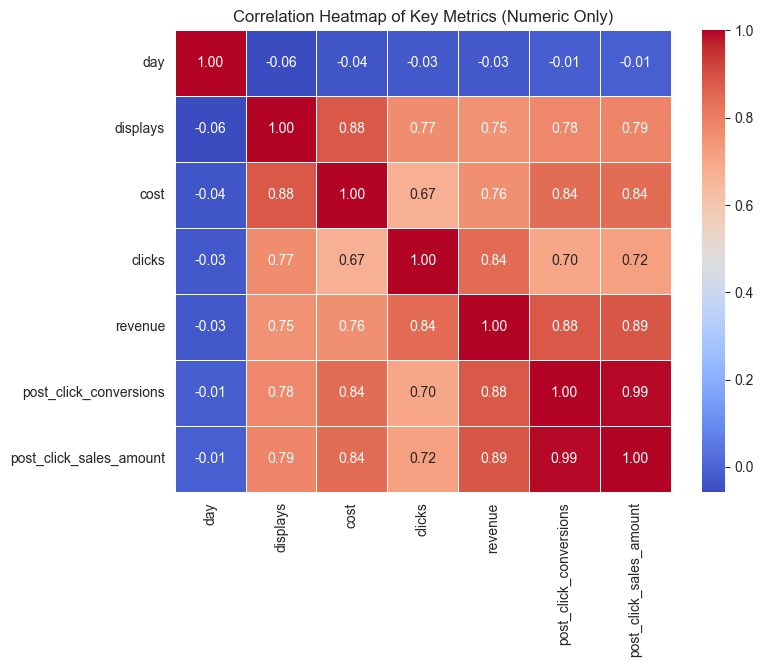

In [5]:
# Select only numeric columns for correlation analysis
numeric_df = df_cleaned.select_dtypes(include=["number"])

# Replot the heatmap with corrected data
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Key Metrics (Numeric Only)")
plt.show()


In [6]:

df_cleaned["ROI"] = (df_cleaned["revenue"] - df_cleaned["cost"]) / df_cleaned["cost"]


campaign_performance = df_cleaned.groupby("campaign_number")[["cost", "revenue", "ROI"]].mean().sort_values(by="ROI", ascending=False)


campaign_performance.head()


C:\Users\aishw\AppData\Local\Temp\ipykernel_22164\977854103.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  campaign_performance = df_cleaned.groupby("campaign_number")[["cost", "revenue", "ROI"]].mean().sort_values(by="ROI", ascending=False)


,cost,revenue,ROI
campaign_number,,,
camp 3,1.079524,1.566979,inf
camp 1,21.911964,33.522663,1.148795
camp 2,10.555979,21.617358,0.591237


In [7]:
# Calculate average conversion rate per placement
df_cleaned["conversion_rate"] = df_cleaned["post_click_conversions"] / df_cleaned["clicks"]
placement_performance = df_cleaned.groupby("placement")["conversion_rate"].mean().sort_values(ascending=False)

# Calculate average conversion rate per banner type
banner_performance = df_cleaned.groupby("banner")["conversion_rate"].mean().sort_values(ascending=False)

# Display top 5 placements and banners with highest conversion rates
placement_performance.head(), banner_performance.head()


C:\Users\aishw\AppData\Local\Temp\ipykernel_22164\1056101480.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  placement_performance = df_cleaned.groupby("placement")["conversion_rate"].mean().sort_values(ascending=False)
C:\Users\aishw\AppData\Local\Temp\ipykernel_22164\1056101480.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  banner_performance = df_cleaned.groupby("banner")["conversion_rate"].mean().sort_values(ascending=False)


(placement
 Unknown    inf
 abc        inf
 def        inf
 ghi        inf
 jkl        inf
 Name: conversion_rate, dtype: float64,
 banner
 160 x 600    inf
 300 x 250    inf
 468 x 60     inf
 670 x 90     inf
 800 x 250    inf
 Name: conversion_rate, dtype: float64)

In [8]:
# Avoid division by zero by filtering out rows where clicks are 0
df_filtered = df_cleaned[df_cleaned["clicks"] > 0].copy()
df_filtered["conversion_rate"] = df_filtered["post_click_conversions"] / df_filtered["clicks"]

# Recalculate performance metrics
placement_performance = df_filtered.groupby("placement")["conversion_rate"].mean().sort_values(ascending=False)
banner_performance = df_filtered.groupby("banner")["conversion_rate"].mean().sort_values(ascending=False)

# Display top 5 placements and banners with highest conversion rates
placement_performance.head(), banner_performance.head()


C:\Users\aishw\AppData\Local\Temp\ipykernel_22164\3977636076.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  placement_performance = df_filtered.groupby("placement")["conversion_rate"].mean().sort_values(ascending=False)
C:\Users\aishw\AppData\Local\Temp\ipykernel_22164\3977636076.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  banner_performance = df_filtered.groupby("banner")["conversion_rate"].mean().sort_values(ascending=False)


(placement
 abc    0.301971
 jkl    0.224332
 ghi    0.187649
 mno    0.182342
 def    0.152955
 Name: conversion_rate, dtype: float64,
 banner
 468 x 60     0.480172
 670 x 90     0.212334
 300 x 250    0.184054
 580 x 400    0.175724
 728 x 90     0.168357
 Name: conversion_rate, dtype: float64)

In [ ]:
#modeling

In [9]:
import numpy as np

# Extract unique campaigns (arms for MAB)
campaigns = df_cleaned["campaign_number"].unique()
num_campaigns = len(campaigns)

# Initialize rewards and trials for each campaign
campaign_rewards = {c: 0 for c in campaigns}  # Successes (e.g., conversions)
campaign_trials = {c: 1 for c in campaigns}   # Total trials (avoiding division by zero)

# Simulate MAB using Thompson Sampling
np.random.seed(42)  # For reproducibility

# Number of ad spend decisions (e.g., 1000 rounds of budget allocation)
num_rounds = 1000
selected_campaigns = []

for _ in range(num_rounds):
    sampled_means = {
        c: np.random.beta(campaign_rewards[c] + 1, campaign_trials[c] - campaign_rewards[c] + 1)
        for c in campaigns
    }
    
    # Select the campaign with the highest sampled mean (Thompson Sampling)
    best_campaign = max(sampled_means, key=sampled_means.get)
    selected_campaigns.append(best_campaign)
    
    # Simulate reward (success or failure based on actual conversion data)
    conversion_rate = df_cleaned[df_cleaned["campaign_number"] == best_campaign]["conversion_rate"].mean()
    reward = np.random.binomial(1, conversion_rate)  # Simulate click/conversion success
    
    # Update campaign statistics
    campaign_rewards[best_campaign] += reward
    campaign_trials[best_campaign] += 1

# Compute final campaign selection percentages
campaign_selection_percent = {c: selected_campaigns.count(c) / num_rounds for c in campaigns}
campaign_selection_percent


ValueError: p < 0, p > 1 or p is NaN

In [10]:
# Replace NaN conversion rates with a small default value (0.01) to avoid errors
df_cleaned["conversion_rate"] = df_cleaned["conversion_rate"].fillna(0.01)

# Ensure conversion rates stay within valid bounds [0,1]
df_cleaned["conversion_rate"] = np.clip(df_cleaned["conversion_rate"], 0, 1)

# Re-run the MAB simulation
campaign_rewards = {c: 0 for c in campaigns}  # Reset rewards
campaign_trials = {c: 1 for c in campaigns}   # Reset trials
selected_campaigns = []

for _ in range(num_rounds):
    sampled_means = {
        c: np.random.beta(campaign_rewards[c] + 1, campaign_trials[c] - campaign_rewards[c] + 1)
        for c in campaigns
    }
    
    # Select the campaign with the highest sampled mean (Thompson Sampling)
    best_campaign = max(sampled_means, key=sampled_means.get)
    selected_campaigns.append(best_campaign)
    
    # Simulate reward (success or failure based on actual conversion data)
    conversion_rate = df_cleaned[df_cleaned["campaign_number"] == best_campaign]["conversion_rate"].mean()
    reward = np.random.binomial(1, conversion_rate)  # Simulate click/conversion success
    
    # Update campaign statistics
    campaign_rewards[best_campaign] += reward
    campaign_trials[best_campaign] += 1

# Compute final campaign selection percentages
campaign_selection_percent = {c: selected_campaigns.count(c) / num_rounds for c in campaigns}
campaign_selection_percent


{'camp 1': 0.959, 'camp 2': 0.021, 'camp 3': 0.02}

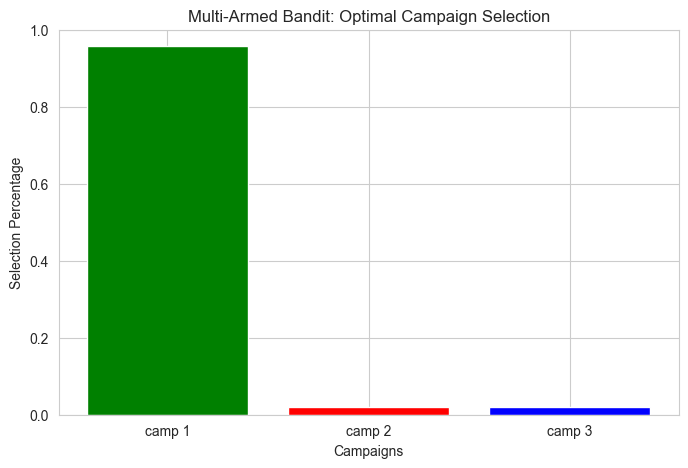

In [11]:
import matplotlib.pyplot as plt

# Visualizing the selection frequency of each campaign
plt.figure(figsize=(8, 5))
plt.bar(campaign_selection_percent.keys(), campaign_selection_percent.values(), color=["green", "red", "blue"])
plt.xlabel("Campaigns")
plt.ylabel("Selection Percentage")
plt.title("Multi-Armed Bandit: Optimal Campaign Selection")
plt.ylim(0, 1)
plt.show()
